In [5]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')


from MyConfig import MY_SEED, daq_features, eyetrk_features
from MyDataLoader import daq_dataloader, raw_eyetrk_dataloader, combined_dataloader

In [7]:
df = daq_dataloader(['Label']+daq_features)
y = df['Label']
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc=le.transform(y)
df['Label_enc'] = le.transform(y)

print('encoded classes', classes)
df

df shape (before dropnan): (38400, 6)
total nan: 5
df shape (after dropnan): (38399, 6)
(38399, 6)
(38399, 6)
(38399, 6)
(38399, 6)
df_wind.shape (1280, 16)
encoded classes ['construct' 'deer' 'rain' 'tire']


VDS_Brake_Pedal_Force0                       ... SCC_Lane_Deviation1 Label Label_enc
                      mean     median       std  ...                 std                
0                 2.779949   2.796063  0.027025  ...            0.087795  tire         3
1                 2.784344   2.796063  0.019766  ...            0.041494  tire         3
2                 2.782879   2.796063  0.020483  ...            0.018906  tire         3
3                 2.779949   2.796063  0.021539  ...            0.045180  tire         3
4                 2.779949   2.796063  0.021539  ...            0.032874  tire         3
..                     ...        ...       ...  ...                 ...   ...       ...
315              16.890456  15.934540  2.157947  ...            1.053478  deer         1
316              16.302861  16.222935  0.408888  ...            1.073228  deer         1
317              15.595514  15.534910  0.450774  ...            0.932522  deer         1
318               3.635157   0.000000  6.563503  ...            0.628631  deer         1
319               0.000000   0.000000  0.000000  ...            0.198953  deer         1

[1280 rows x 17 columns]

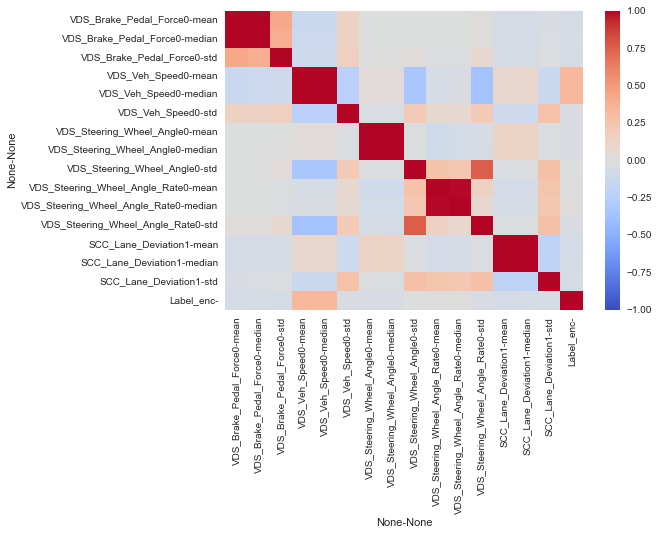

In [8]:
p=sns.heatmap(df.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm")

In [9]:
X = df.drop(['Label', 'Label_enc'], axis=1)
Y = df[['Label_enc']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=MY_SEED)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

print(Y_train[:10]) # check if isShuffled

(896, 15) (384, 15) (896, 1) (384, 1)
    Label_enc
             
46          1
182         3
75          0
111         2
48          1
159         2
46          2
103         2
174         2
146         0


In [10]:
std_scale = StandardScaler()
X_train_std = std_scale.fit_transform(X_train)
X_test_std = std_scale.transform(X_test)

In [12]:
# CLASSIFIERS
def DTree_clf():
    DT_clf = DecisionTreeClassifier(max_depth=10, random_state=MY_SEED)
    DT_clf.fit(X_train_std, Y_train)
    y_pred = DT_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return DT_clf, acc, cm

def RF_clf():
    RF_clf = RandomForestClassifier(n_estimators=100,random_state=MY_SEED)
    RF_clf.fit(X_train_std, Y_train)
    y_pred = RF_clf.predict(X_test_std)
    acc = accuracy_score(Y_test, y_pred)
    cm = confusion_matrix(Y_test, y_pred)
    return RF_clf, acc, cm

# PLOT CONFUSION MATRIX
def plt_conf_matrix(acc, cm):
    fig, ax = plt.subplots(figsize=(5, 3),dpi= 100)
    ax =sns.heatmap(cm/np.sum(cm), annot=True, cmap = "inferno", xticklabels=classes, yticklabels=classes)
    plt.yticks(rotation=0) 
    plt.title('accuracy = %3.3f'%acc)
    ax.axis('equal')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()

0.8255208333333334
[0.0225721  0.         0.05531466 0.2259618  0.17369144 0.02558942
 0.17999321 0.00618143 0.01988059 0.0286398  0.00523914 0.12683495
 0.02476319 0.0572325  0.04810578]


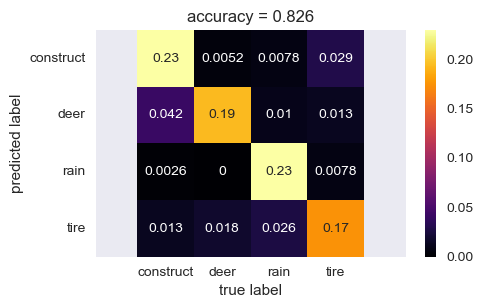

C:\Users\quannh\AppData\Local\Temp/ipykernel_19904/3922555338.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_clf.fit(X_train_std, Y_train)


0.8567708333333334
[0.02870558 0.02298925 0.03478469 0.14547599 0.14845041 0.06064929
 0.08203364 0.08929942 0.06509071 0.03475582 0.02235858 0.07937572
 0.05201744 0.05305872 0.08095475]


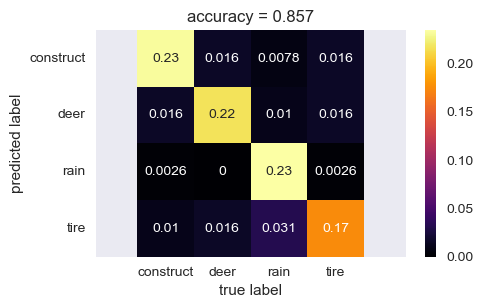

In [13]:
DT_clf, acc, cm = DTree_clf()
print(acc)

print(DT_clf.feature_importances_)
plt_conf_matrix(acc, cm)


RF_clf, acc, cm = RF_clf()
print(acc)
print(RF_clf.feature_importances_)
plt_conf_matrix(acc, cm)


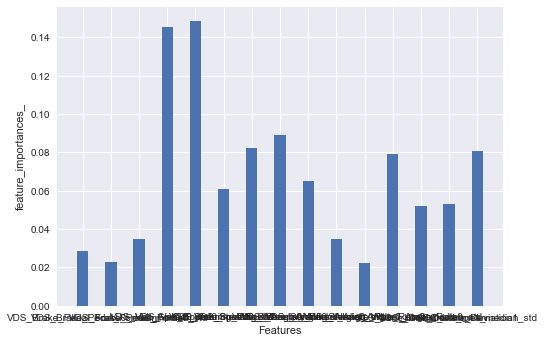

In [15]:
# feature_importances = pd.DataFrame(
#     RF_clf.feature_importances_,
#     index =X_train.columns,
#     columns=['importance']).sort_values('importance', ascending=False)
# feature_importances.plot()

cols = ['_'.join(list(X_train.columns[i])) for i in range(len(X_train.columns))]
plt.bar(cols, RF_clf.feature_importances_, width = 0.4)
plt.xlabel("Features")
plt.ylabel("feature_importances_")
plt.show()
